In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold, StratifiedKFold

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load the data 
data = load_breast_cancer()

# Assign data and labels
X, y = data.data, data.target

# Print class names
print(f'Targets[0,1]: {data.target_names}')

# Print feature names
print(data.feature_names)

# Print the size of the data
print(f'Data has {X.shape[1]} features')


# 0 = malignant, 1 = benign

Targets[0,1]: ['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Data has 30 features


In [3]:
scaler = StandardScaler() 
print(X.shape)
#print('before')
#for col  in range(X.shape[1]):
#    print(col, np.mean(X[:,col]),np.std(X[:,col]))
# Standardization 
X = scaler.fit_transform(X)


(569, 30)


In [4]:
def metrics(y, y_pred): 
    true_positive = np.sum(np.logical_and(y_pred == 1, y == 1))
    false_positive = np.sum(np.logical_and(y_pred == 1, y == 0))
    true_negative = np.sum(np.logical_and(y_pred == 0, y == 0))
    false_negative = np.sum(np.logical_and(y_pred == 0, y == 1))
    
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_negative + false_positive)
    recall = true_positive / (true_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    specificity = true_negative / (false_positive + true_negative)
    f1_score_value = (2 * precision * recall) / (precision + recall)
    
    metrics_dict = {
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Specificity': specificity,
        'F1 Score': f1_score_value
    }
    
    return metrics_dict


# Sample data for true labels and predicted labels
y_actual = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0])
y_pred = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

# Call the metrics function with the sample data
metrics(y_actual, y_pred)

# Test with Sklearn
accuracy = accuracy_score(y_actual, y_pred)
recall = recall_score(y_actual, y_pred)
precision = precision_score(y_actual, y_pred)
f1 = f1_score(y_actual,y_pred)
print(f'The Sklearn accuracy score is {accuracy}')
print(f'The Sklearn recall score is {recall}')
print(f'The Sklearn precision score is {precision}')
print(f'The Sklearn f1 score is {f1}')


The Sklearn accuracy score is 0.7
The Sklearn recall score is 0.8
The Sklearn precision score is 0.6666666666666666
The Sklearn f1 score is 0.7272727272727272


In [48]:
class Perceptron:
    
    '''
    A class implementing the Perceptron Algorithm.
    '''
    
    
    def __init__(self): 
        self.weights = None
        self.bias = None
        self.losses = []
        self.mistakes = []
        self.is_trained=False
           
    def fit(self, train_data, labels, learning_rate=0.0001, epochs=1000):
        '''
        Used for training the algorithm. 
        
        :param train_data: array, features
        :param labels: array, true values
        :return: None
        '''
        if len(train_data) != len(labels):
            raise ValueError("Number of samples in training data and labels must be equal.")
            
        if not isinstance(learning_rate, (int, float)) or learning_rate <= 0:
            raise ValueError("Learning rate must be a positive number.")
        
        if not isinstance(epochs, int) or epochs <= 0:
            raise ValueError("Number of epochs must be a positive integer.")
            

        num_features = train_data.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0
        self.is_trained=True
        
        for _ in range(epochs):
            total_loss = 0 
            num_mistakes = 0
            
            
            for x, label in zip(train_data, labels):
                z = np.dot(x, self.weights) + self.bias
                y_pred = self.activation_func( z)
                # Update weights and bias based on prediction and label
                update = learning_rate * (label - y_pred)
                self.weights += update * x
                self.bias += update
                if False: 
                    print('label %d z %f y_pred %d' %( label, z, y_pred) )    
                # Calculate the Perceptron loss for the current sample and add it to the total loss
                total_loss += max(0, -label *z)
                
                # Count the number of mistakes
                if y_pred != label:
                    num_mistakes += 1
            
            # Calculate the mean Perceptron loss and store it for visualization
            mean_loss = total_loss / len(train_data)
            self.losses.append(mean_loss)
            # Store the number of mistakes for visualization
            self.mistakes.append(num_mistakes)
            if num_mistakes == 0:
                print('quit after %d epochs with last mean_loss %f' % (_, mean_loss))
                break
            else:
                pass
                #print('next %d epochs with last mean_loss %f' % (_, mean_loss))

       # print('quit after max epochs\n')
        
            
    def predict(self, test_data):
        '''
        Makes predictions using the line equation passed through the step function.
        
        :param X: array, features
        :return: array, predictions
        '''
        if not self.is_trained:  # Check if the model is trained before predicting
            raise RuntimeError("The model is not trained. Call 'fit' before using 'predict'.")
            
            a = self.activation_func(np.dot(test_data, self.weights) + self.bias)
            return a
        
    def activation_func(self, x):
        '''
        Step function, used as the activation function for the Perceptron Algorithm.
        
        :param x: float, prediction made
        :return: int
        '''
        return np.where(x >= 0, 1, -1)
                
    
    

In [49]:
print(40.0/455)

0.08791208791208792


(569, 30)
(455, 30)


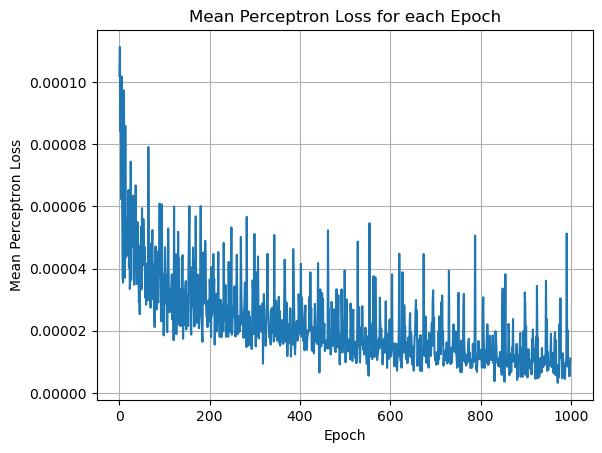

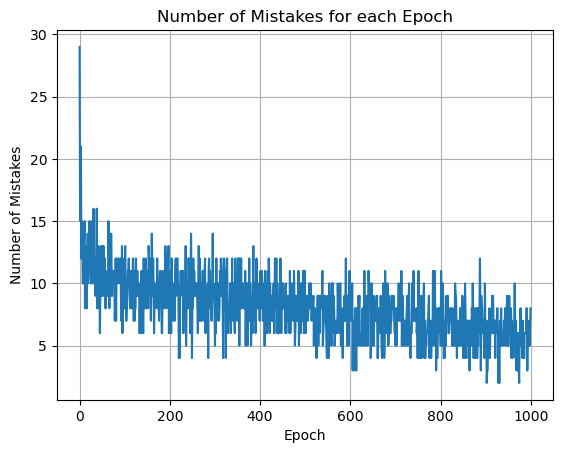

In [50]:
yy = y.copy()
print(X.shape)
yy[yy==0]=-1 #change 0 to -1 to work with Perceptron [-1,1] for convenience
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state=42)
print(X_train.shape)
model = Perceptron()
model.fit(X_train, y_train, learning_rate=0.0001, epochs=1000)
if True:
    # Plotting the mean Perceptron loss for each epoch
    plt.plot(model.losses)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Perceptron Loss')
    plt.title('Mean Perceptron Loss for each Epoch')
    plt.grid(True)
    plt.show()

    # Plotting the number of mistakes for each epoch
    plt.plot(model.mistakes)
    plt.xlabel('Epoch')
    plt.ylabel('Number of Mistakes')
    plt.title('Number of Mistakes for each Epoch')
    plt.grid(True)
    plt.show()
    


In [8]:


# Initialize lists to store metrics for each fold
accuracy_list = []
recall_list = []
precision_list = []
specificity_list = []
f1_score_list = []

# Perform 10-fold random cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your logistic regression model
    perceptron_model = Perceptron()
    perceptron_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = perceptron_model.predict(X_test)

    # Calculate metrics for this fold and store them in respective lists
    metrics_dict = metrics(y_test, y_pred)
    accuracy_list.append(metrics_dict['Accuracy'])
    recall_list.append(metrics_dict['Recall'])
    precision_list.append(metrics_dict['Precision'])
    specificity_list.append(metrics_dict['Specificity'])
    f1_score_list.append(metrics_dict['F1 Score'])

# Print the metrics after cross-validation
print("Average Accuracy:", np.mean(accuracy_list))
print("Standard Deviation Accuracy:", np.std(accuracy_list))

print("Average Recall:", np.mean(recall_list))
print("Standard Deviation Recall:", np.std(recall_list))

print("Average Precision:", np.mean(precision_list))
print("Standard Deviation Precision:", np.std(precision_list))

print("Average Specificity:", np.mean(specificity_list))
print("Standard Deviation Specificity:", np.std(specificity_list))

print("Average F1 Score:", np.mean(f1_score_list))
print("Standard Deviation F1 Score:", np.std(f1_score_list))

Average Accuracy: 0.6581002281592344
Standard Deviation Accuracy: 0.15257559052536915
Average Recall: 1.0
Standard Deviation Recall: 0.0
Average Precision: 0.6581002281592344
Standard Deviation Precision: 0.15257559052536915
Average Specificity: 0.0
Standard Deviation Specificity: 0.0
Average F1 Score: 0.7836247147678407
Standard Deviation F1 Score: 0.11086227259890563


In [9]:
# Initialize lists to store metrics for each fold
accuracy_list = []
recall_list = []
precision_list = []
specificity_list = []
f1_score_list = []

# Perform 10-fold stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your logistic regression model
    perceptron_model = Perceptron()
    perceptron_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = perceptron_model.predict(X_test)

    # Calculate metrics for this fold and store them in respective lists
    metrics_dict = metrics(y_test, y_pred)
    accuracy_list.append(metrics_dict['Accuracy'])
    recall_list.append(metrics_dict['Recall'])
    precision_list.append(metrics_dict['Precision'])
    specificity_list.append(metrics_dict['Specificity'])
    f1_score_list.append(metrics_dict['F1 Score'])

# Print the metrics after stratified cross-validation
print("Average Accuracy:", np.mean(accuracy_list))
print("Standard Deviation Accuracy:", np.std(accuracy_list))

print("Average Recall:", np.mean(recall_list))
print("Standard Deviation Recall:", np.std(recall_list))

print("Average Precision:", np.mean(precision_list))
print("Standard Deviation Precision:", np.std(precision_list))

print("Average Specificity:", np.mean(specificity_list))
print("Standard Deviation Specificity:", np.std(specificity_list))

print("Average F1 Score:", np.mean(f1_score_list))
print("Standard Deviation F1 Score:", np.std(f1_score_list))

Average Accuracy: 0.6739724466679791
Standard Deviation Accuracy: 0.11935388749819048
Average Recall: 1.0
Standard Deviation Recall: 0.0
Average Precision: 0.6739724466679791
Standard Deviation Precision: 0.11935388749819048
Average Specificity: 0.0
Standard Deviation Specificity: 0.0
Average F1 Score: 0.7994019155123994
Standard Deviation F1 Score: 0.08206271085498354


In [ ]:
# Random cross validation and stratified seem to be pretty similar in its reporting but I would probably choose stratified because
# it seems that it reports better statistics. 

In [65]:


class LogisticRegression:
    '''
    A class implementing Logistic Regression using Gradient Descent.
    '''
    def __init__(self):
        self.weights, self.bias = None, None
        self.mce = []
        self.fitted = False
        
    @staticmethod
    def _sigmoid(x):
        '''
        Sigmoid function, used as the activation function for Logistic Regression.
        
        :param x: float, prediction made
        :return: float
        '''
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def _mean_cross_entropy(y, y_predicted, dbg=False):
        '''
         Calculate mean cross entropy value between actual classes 
        and predicted probabilities.
        
        :param y: array, Actual Labels
        :param y_predicted: array, predicted probabilities
        :return: float
        '''
        return -np.sum(y*np.log(y_predicted+1.0e-12) + (1-y)*np.log(1-y_predicted+1.0e-12))/len(y)
    
    
        
    def fit(self,X, y, learning_rate=0.0001, max_iter=1000, lambda_=0.0):
        '''
        Used to calculate the coefficient of the logistic regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        
        if X.shape[0] != len(y):
            raise ValueError("The Number of samples in X must be equal to the number of elements in y.")
            
        if not (0 < learning_rate < 1):
            raise ValueError("The Learning Rate needs to be between 0 and 1. ")
        
        if not isinstance(max_iter, int) or max_iter <= 0:
            raise ValueError("max_iter needs to be a positive integer.")
        
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.mce = []
        k = 0
        pmce = 1e+6
        # 2. Perform gradient descent
        for i in range(max_iter):
            linear_pred = np.dot(X, self.weights) + self.bias
            yhat = self._sigmoid(linear_pred)
            k=k+1
            # Calculate derivatives
            partial_w = np.dot(X.T, (yhat-y))
            partial_d = np.sum(yhat-y)
            
            # Update the coefficients
            self.weights -= learning_rate * partial_w
            self.bias    -= learning_rate * partial_d
            
             #Calculate mce 
            
            mce = self._mean_cross_entropy(y, yhat, False)
            self.mce.append(mce)
            pmce = mce 
            
            self.fitted = True
            
    def predict_prob(self, X):
        '''
        Calculates prediction probabilities passed through the sigmoid function.
        
        :param X: array, features
        :return: array, prediction probabilities
        '''
        if X.shape[1] != self.weights.shape[0]:
            X = np.c_[np.ones(X.shape[0]), X]
        linear_pred = np.dot(X, self.weights)
        return self._sigmoid(linear_pred)
    
    
    # Convert type to int .astype(int)
    def predict(self, X):
        '''
        Makes predictions using the line equation passed through the sigmoid function.
        
        :param X: array, features
        :return: array, predictions
        '''
        
        if not self.fitted:
            raise RuntimeError("Model must be fitted first before making predictions.")
            
        probability = self.predict_prob(X)
        
        #print(probability)
        #print(type(probability))
        
        prediction = (probability > 0.5).astype(int)
        
        return prediction
        
  

        
    

        
    
    
    

In [66]:
yr = y.copy()
X_train, X_test, y_train, y_test = train_test_split(X, yr, test_size=0.2, random_state=42)
# Initialize the Logistic Regression model
log_reg = LogisticRegression()
# Fit the model to the complete dataset
log_reg.fit(X_train, y_train, learning_rate=0.0001, max_iter=1000, lambda_=0.0)

[0.071675568228683, 0.07165996579563412, 0.07164438565108812, 0.07162882773913547, 0.07161329200406602]


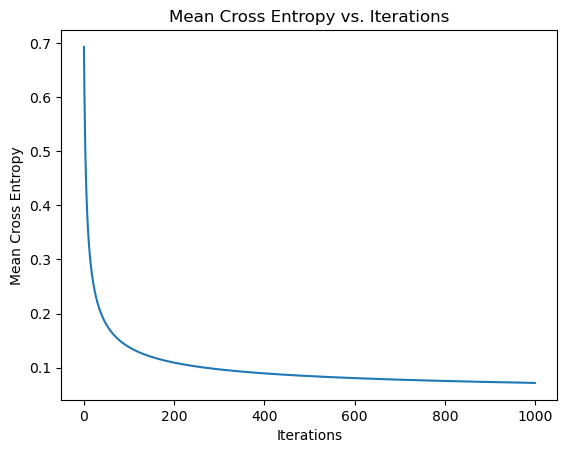

In [67]:

# Plot the Mean Cross Entropy for each iteration
print(log_reg.mce[-5:])
plt.plot(range(len(log_reg.mce)), log_reg.mce)
plt.xlabel('Iterations')
plt.ylabel('Mean Cross Entropy')
plt.title('Mean Cross Entropy vs. Iterations')
plt.show()




In [63]:
#  
model = LogisticRegression()

# Initialize lists to store metrics for each fold
accuracy_list = []
recall_list = []
precision_list = []
specificity_list = []
f1_score_list = []

# Perform 10-fold random cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your logistic regression model
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logistic_regression_model.predict(X_test)

    # Calculate metrics for this fold and store them in respective lists
    metrics_dict = metrics(y_test, y_pred)
    accuracy_list.append(metrics_dict['Accuracy'])
    recall_list.append(metrics_dict['Recall'])
    precision_list.append(metrics_dict['Precision'])
    specificity_list.append(metrics_dict['Specificity'])
    f1_score_list.append(metrics_dict['F1 Score'])

# Print the metrics after cross-validation
print("Average Accuracy:", np.mean(accuracy_list))
print("Standard Deviation Accuracy:", np.std(accuracy_list))

print("Average Recall:", np.mean(recall_list))
print("Standard Deviation Recall:", np.std(recall_list))

print("Average Precision:", np.mean(precision_list))
print("Standard Deviation Precision:", np.std(precision_list))

print("Average Specificity:", np.mean(specificity_list))
print("Standard Deviation Specificity:", np.std(specificity_list))

print("Average F1 Score:", np.mean(f1_score_list))
print("Standard Deviation F1 Score:", np.std(f1_score_list))







Average Accuracy: 0.9771616541353385
Standard Deviation Accuracy: 0.017622257031301172
Average Recall: 0.9833182857174794
Standard Deviation Recall: 0.017943406270562925
Average Precision: 0.9794937906017817
Standard Deviation Precision: 0.023745032357513057
Average Specificity: 0.9693085302497068
Standard Deviation Specificity: 0.032393244051763796
Average F1 Score: 0.9811658054875586
Standard Deviation F1 Score: 0.014705273043421231


In [64]:

model = LogisticRegression()

# Initialize lists to store metrics for each fold
accuracy_list = []
recall_list = []
precision_list = []
specificity_list = []
f1_score_list = []

# Perform 10-fold stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train your logistic regression model
    logistic_regression_model = LogisticRegression()
    logistic_regression_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = logistic_regression_model.predict(X_test)

    # Calculate metrics for this fold and store them in respective lists
    metrics_dict = metrics(y_test, y_pred)
    accuracy_list.append(metrics_dict['Accuracy'])
    recall_list.append(metrics_dict['Recall'])
    precision_list.append(metrics_dict['Precision'])
    specificity_list.append(metrics_dict['Specificity'])
    f1_score_list.append(metrics_dict['F1 Score'])

# Print the metrics after stratified cross-validation
print("Average Accuracy:", np.mean(accuracy_list))
print("Standard Deviation Accuracy:", np.std(accuracy_list))

print("Average Recall:", np.mean(recall_list))
print("Standard Deviation Recall:", np.std(recall_list))

print("Average Precision:", np.mean(precision_list))
print("Standard Deviation Precision:", np.std(precision_list))

print("Average Specificity:", np.mean(specificity_list))
print("Standard Deviation Specificity:", np.std(specificity_list))

print("Average F1 Score:", np.mean(f1_score_list))
print("Standard Deviation F1 Score:", np.std(f1_score_list))

Average Accuracy: 0.9771929824561403
Standard Deviation Accuracy: 0.01929824561403508
Average Recall: 0.9802380952380952
Standard Deviation Recall: 0.028488526110163257
Average Precision: 0.983598430966852
Standard Deviation Precision: 0.017859514691914807
Average Specificity: 0.9716450216450216
Standard Deviation Specificity: 0.031462809156816096
Average F1 Score: 0.981590486391338
Standard Deviation F1 Score: 0.016091187243361053


In [ ]:
# The performance is very similar between random cross validation and stratified. I would probably choose the stratified cross
# valdiation because it seems like it is slightly higher in its reporting.

In [ ]:
# Q6 : 


# I would use Logisitic Regression in a real time scenario.The Perceptron algorithm has much greater loss and is a lot less 
# accurate. It makes more mistakes than the logistic regression algorithm. The logistic regression is also a lot more useful because it can actually predict probabilities, while perceptron 
# can only predict yes or no. This allows logistic regression to be able to predict likelihoods which is a lot more useful. 
